1. Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [17]:
%pwd  
#import os
#print (os.getcwd())

'C:\\Users\\lucho'

In [23]:
df =pd.read_csv(r"C:\Users\lucho\Desktop\Cours Senegal 2020\TP machine learning\house.csv")
df.head(6)
df.shape
#df.dtypes

(545, 2)

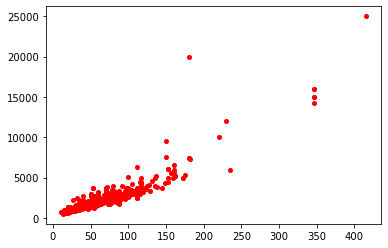

In [20]:
#Representation des données
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
plt.show()

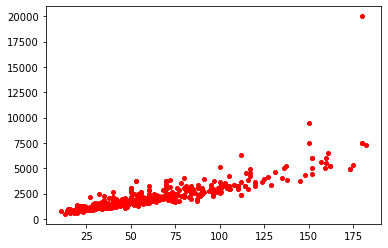

(536, 2)

In [27]:
#Limitation aux surface  <200
df = df[df['surface'] < 200]
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
plt.show()
df.shape

In [25]:
X = np.matrix([np.ones(df.shape[0]), df['surface'].values]).T
y = np.matrix(df['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)


[[121.60147133]
 [ 33.61347533]]


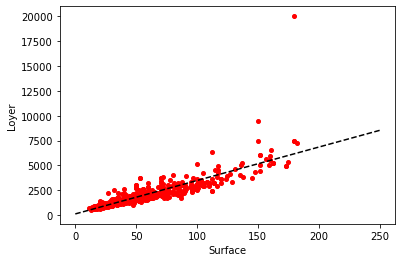

In [26]:
#Affichage du nuage des points et du modèle
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
plt.show()

In [29]:
#predictions
theta.item(0) + theta.item(1) * 35

1298.0731080517821

In [28]:
model = linear_model.LinearRegression()
model.fit(X, y)
#model.predict(<des données de test>)
model.predict([[1,35]])

array([[1298.07310805]])

In [15]:
model.coef_

array([[ 0.        , 30.66119596]])

In [30]:
theta

matrix([[121.60147133],
        [ 33.61347533]])

In [24]:
model.intercept_

array([266.45460292])

## Approche Ensemble de test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#model.fit(X_train, y_train)
#predicted = model.predict(X_test)
#plt.plot(y_test,predicted, 'ro', c = 'r')
y_train.shape

(428, 1)

In [39]:
model.score(X_train, y_train)

0.6730769696630845

In [40]:
model.score(X_test, y_test)

0.839085966318295

In [42]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print("R2 : ", metrics.r2_score(y_train,model.predict(X_train)))
print("MSE : ",metrics.mean_squared_error(y_test, model.predict(X_test)))
print("RMSE_test : ", np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("MAE : ", metrics.mean_absolute_error(y_test, model.predict(X_test)))

R2 :  0.6730769696630845
MSE :  227057.98363113782
RMSE_test :  476.5060163640516
RMSE_train :  846.8601004368065
MAE :  317.57573057754996


In [44]:
scores_model = cross_val_score(model,X,y,cv =5,scoring ='r2')
MSE = cross_val_score(model,X,y,cv =5)
MAE = cross_val_score(model,X,y,cv =5,scoring ='neg_mean_absolute_error')
print(MSE.mean())
#print(MAE)

0.6648266751433278


In [45]:
df.head(5)

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
